In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import spacy
from spacy.lang.en import English
spacy.load('en_core_web_sm')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import re
import pickle
from helpers import *
from gensim.models.word2vec import Word2Vec

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\miska\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
with open("tokens_v2.txt", "rb") as fp:   # Unpickling
     X_processed = pickle.load(fp)

In [4]:
import numpy as np
Xtrain = np.zeros(shape=(90001, 81, 120))
Xval = np.zeros(shape=(30001, 81, 120))
Xtest = np.zeros(shape=(30001, 81, 120))
ytrain = np.zeros(shape=(90001, 3))
yval = np.zeros(shape=(30001, 3))
ytest = np.zeros(shape=(30001, 3))

In [5]:
y_train = pd.read_csv('y_train.csv', sep=';', header=None)
y_test = pd.read_csv('y_test.csv', sep=';', header=None)
y_val =pd.read_csv('y_val.csv', sep=';', header=None)
X_train = np.load('x_train.npy')
X_test = np.load('x_test.npy') 
X_val = np.load('x_val.npy')

In [7]:
model_120 = Word2Vec.load('word2vec_model_120.model')

In [9]:
Xtrain, ytrain = building_subset_after_load(X_train, Xtrain, X_processed, model_120, ytrain, y_train)
Xtest, ytest = building_subset_after_load(X_test, Xtest, X_processed, model_120, ytest, y_test)
Xval, yval = building_subset_after_load(X_val, Xval, X_processed, model_120, yval, y_val)

In [17]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='elu', padding='same', input_shape=(81, 120)))
model.add(Dropout(0.25))
model.add(Conv1D(32, kernel_size=2, activation='elu', padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.5))
    
model.add(Dense(3, activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

In [22]:

history = model.fit(Xtrain, ytrain,
          batch_size=32,
          shuffle=True,
          epochs=100,
          validation_data=(Xval, yval),
          callbacks=[EarlyStopping(min_delta=0.00025, patience=2)], 
          verbose=2)

Train on 90001 samples, validate on 30001 samples
Epoch 1/100
 - 42s - loss: 0.8731 - acc: 0.6272 - val_loss: 0.6444 - val_acc: 0.7241
Epoch 2/100
 - 34s - loss: 0.6819 - acc: 0.7017 - val_loss: 0.6101 - val_acc: 0.7366
Epoch 3/100
 - 28s - loss: 0.6315 - acc: 0.7233 - val_loss: 0.5924 - val_acc: 0.7426
Epoch 4/100
 - 28s - loss: 0.6103 - acc: 0.7347 - val_loss: 0.5858 - val_acc: 0.7454
Epoch 5/100
 - 28s - loss: 0.5981 - acc: 0.7398 - val_loss: 0.5802 - val_acc: 0.7479
Epoch 6/100
 - 28s - loss: 0.5893 - acc: 0.7448 - val_loss: 0.5756 - val_acc: 0.7510
Epoch 7/100
 - 28s - loss: 0.5841 - acc: 0.7465 - val_loss: 0.5757 - val_acc: 0.7508
Epoch 8/100
 - 28s - loss: 0.5788 - acc: 0.7497 - val_loss: 0.5733 - val_acc: 0.7507
Epoch 9/100
 - 28s - loss: 0.5744 - acc: 0.7514 - val_loss: 0.5729 - val_acc: 0.7520
Epoch 10/100
 - 28s - loss: 0.5713 - acc: 0.7530 - val_loss: 0.5676 - val_acc: 0.7529
Epoch 11/100
 - 28s - loss: 0.5674 - acc: 0.7546 - val_loss: 0.5677 - val_acc: 0.7514
Epoch 12/100


0.7500749975000833


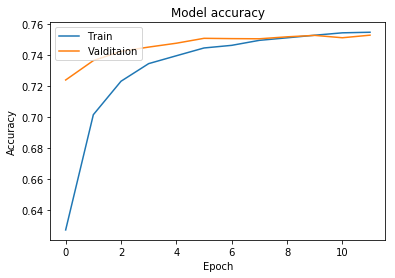

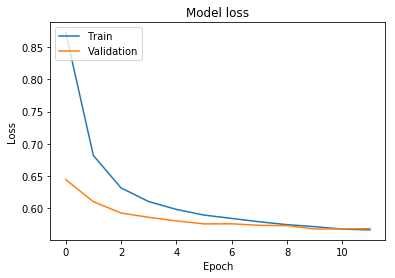

In [24]:
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
ypred_nn = model.predict_classes(Xtest)
ypred_nn = np.array(ypred_nn, dtype=float)
print(accuracy_score(y_test.values, ypred_nn))
visualize_history(history)

In [26]:
ypred_nn[0]

1.0

In [25]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test.values, ypred_nn)

(array([0.81284285, 0.63602117, 0.82208268]),
 array([0.75744212, 0.70803794, 0.78479369]),
 array([0.7841652 , 0.67010017, 0.80300552]),
 array([ 9977, 10015, 10009], dtype=int64))

In [44]:
from sklearn.metrics import recall_score, precision_score, f1_score
print(f'recall:\t{recall_score(y_test.values, ypred_nn, average=None)}')
print(f'precision:\t{precision_score(y_test.values, ypred_nn, average=None)}')
print(f'f1 score:\t{f1_score(y_test.values, ypred_nn, average="weighted")}')


recall:	[0.75744212 0.70803794 0.78479369]
precision:	[0.81284285 0.63602117 0.82208268]
f1 score:	0.752373308340658


In [45]:
print(f'recall:\t{recall_score(y_test.values, ypred_nn, average="weighted")}')
print(f'precision:\t{precision_score(y_test.values, ypred_nn, average="weighted")}')
print(f'f1 score:\t{f1_score(y_test.values, ypred_nn, average="weighted")}')

recall:	0.7500749975000833
precision:	0.7568984591108818
f1 score:	0.752373308340658


In [56]:
from sklearn.preprocessing import label_binarize
for i, y in enumerate(y_test.values):
    if y == 0.:
        Y_test[i, :] = [1, 0, 0]
    elif y == 1.:
        Y_test[i, :] = [0, 1, 0]
    else:
        Y_test[i, :] = [0, 0, 1]
n_classes = Y_test.shape[1]

In [57]:
Y_test[4]

array([1, 0, 0])

In [49]:
y_score = label_binarize(ypred_nn, classes=[0, 1, 2])

Average precision score, micro-averaged over all classes: 0.65


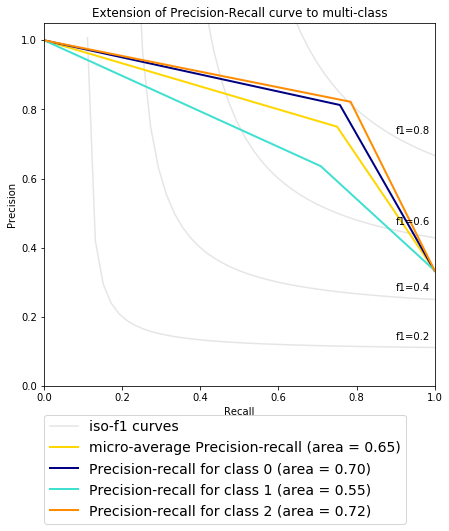

In [58]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

#### Visualisation

In [43]:
model.layers[0].get_weights()[0][0][:][0]

array([-0.0955498 , -0.1325658 ,  0.07318167,  0.01410711,  0.06278936,
        0.01231177,  0.03318324,  0.07811517,  0.03923363,  0.03440699,
       -0.09837096,  0.02590975, -0.04788561, -0.0460857 ,  0.00994714,
       -0.01823444,  0.00815091,  0.010294  , -0.00650118, -0.05686652,
       -0.02627492, -0.09278537, -0.02545227, -0.01094181,  0.06889004,
        0.07215109, -0.03713345, -0.08260687,  0.02407772, -0.01447323,
       -0.0557765 , -0.03179314], dtype=float32)

In [79]:
from sklearn.metrics import confusion_matrix

In [86]:
cm = confusion_matrix(y_test.values, ypred_nn)

In [87]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[0.75744212 0.21449333 0.02806455]
 [0.15017474 0.70803794 0.14178732]
 [0.02357878 0.19162754 0.78479369]]


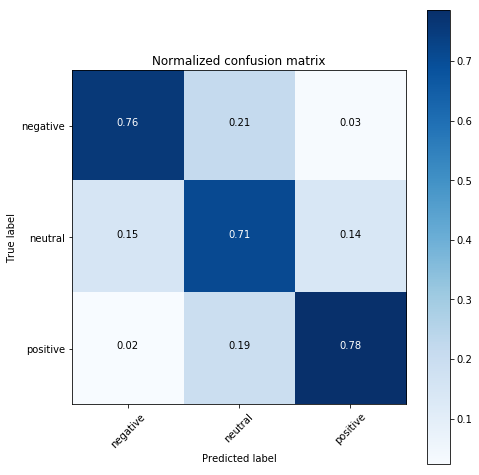

In [91]:
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cm, classes=['negative', 'neutral', 'positive'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [104]:
from sklearn.decomposition import PCA
vocab = model_120[model_120.wv.vocab][:100]
annotation = list(model_120.wv.vocab)
pca = PCA(n_components=2)
res = pca.fit_transform(vocab)

C:\Users\miska\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


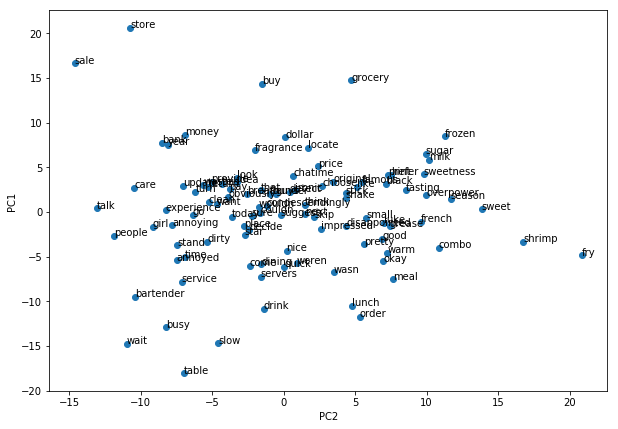

In [108]:
plt.figure(figsize=(10,7))
plt.scatter(res[:, 0], res[:, 1])
for i, ann in enumerate(annotation[:100]):
    plt.annotate(ann, xy=(res[i, 0], res[i, 1]))
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.show()